# Damage Classification Model

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai import *
from fastai.vision import *
from fastai.callbacks import *
from fastai.metrics import error_rate # 1 - accuracy

import os
import sys
sys.path.append(os.path.join(os.getcwd(), '..'))
sys.path.append(os.path.join(os.getcwd(), '../src'))
sys.path.append(os.path.join(os.getcwd(), '../src/utilities'))

from src import CLASSIFICATION_PATH, MODELS_PATH
from scoring import scoring_classification as scoring

Using TensorFlow backend.


# Load Data

In [2]:
path = Path(CLASSIFICATION_PATH)

tfms = get_transforms(flip_vert=True, max_warp=0.1, max_rotate=20, max_zoom=2, max_lighting=0.3)
size = 128
bs = 40

data = (ImageList.from_csv(path, csv_name="train.csv", folder='polygons')
        .split_by_rand_pct()
        .label_from_df(cols='labels')
        .transform(tfms, size=size)
        .databunch(bs =bs)
        .normalize(imagenet_stats))

# View Data

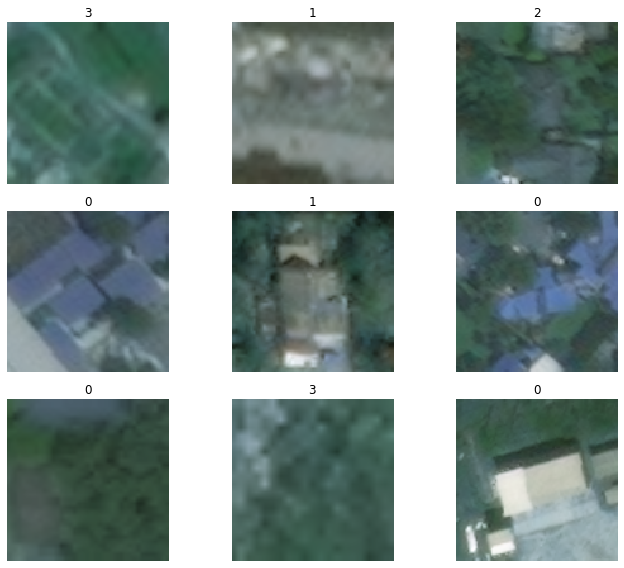

In [3]:
data.show_batch(rows=3, figsize=(10,8), ds_type=DatasetType.Valid)

# Traning model

In [4]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


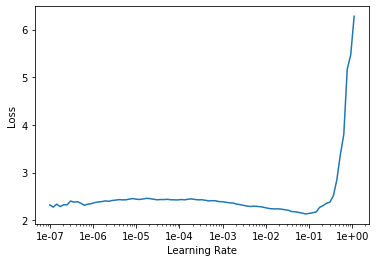

In [5]:
learn.lr_find()
learn.recorder.plot(0,2)

In [6]:
lr = 1e-2
learn.fit_one_cycle(10, max_lr=lr)

# Unfreeze the encoder

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


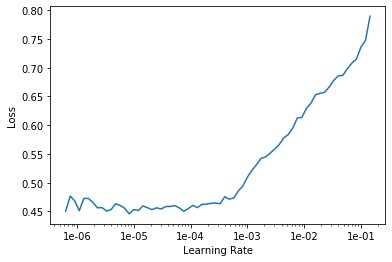

In [7]:
learn.unfreeze() 
learn.lr_find()
learn.recorder.plot()

In [8]:
learn.fit_one_cycle(20, max_lr=slice(3e-5, 3e-4))

In [9]:
learn.export(f'{MODELS_PATH}/classification_res34.pkl')

# Scoring

In [10]:
# scoring from 1000 samples
scoring(1000)

Calculating the score!


/home/ubuntu/anaconda3/lib/python3.7/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Classification Model:
F1:
our model: 0.8459999999999999
baseline model: 0.504
